#Instructions

Instructions
Download and import the Data Science Job Salary dataset.
Normalize the ‘salary’ column using Min-Max normalization.
Implement dimensionality reduction on the dataset.
Aggregate data by ‘experience_level’, calculating average and median salaries.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexanderdawid","key":"2dd26e652c14b72f23669e095446a887"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d milanvaddoriya/data-science-job-salary

Dataset URL: https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary
License(s): other
  0% 0.00/9.97k [00:00<?, ?B/s]
100% 9.97k/9.97k [00:00<00:00, 10.9MB/s]


In [3]:
!unzip data-science-job-salary.zip

Archive:  data-science-job-salary.zip
  inflating: datascience_salaries.csv  


In [6]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('datascience_salaries.csv')

df.head(7)



,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000
5,6,Data scientist,Full Time,Senior,London,USD,68000
6,7,Data scientist,Full Time,Senior,Research Triangle Park,USD,69000


In [8]:
df.shape # will output first number of rows and then number of columns

(1171, 7)

In [9]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [10]:
# Check for null values in each column
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)


Null values in each column:
Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64


In [12]:
# Min-Max Normalization of the 'salary' column
df['salary_normalized'] = (df['salary'] - df['salary'].min()) / (df['salary'].max() - df['salary'].min())

# Inspect afterwards
df[['salary', 'salary_normalized']].head(10)


,salary,salary_normalized
0,149000,0.601010
1,120000,0.454545
2,68000,0.191919
3,120000,0.454545
4,149000,0.601010
5,68000,0.191919
6,69000,0.196970
7,68000,0.191919
8,140000,0.555556
9,68000,0.191919


In [13]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Take numerical colimns only before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
pca_result = pca.fit_transform(scaled_data)

# Add the PCA results to the DataFrame
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Display the first few rows to inspect the PCA results
df[['pca_1', 'pca_2']].head()


,pca_1,pca_2
0,4.453475,-2.112443
1,2.910005,-2.081628
2,0.142332,-2.032025
3,2.910061,-2.077258
4,4.453615,-2.101518


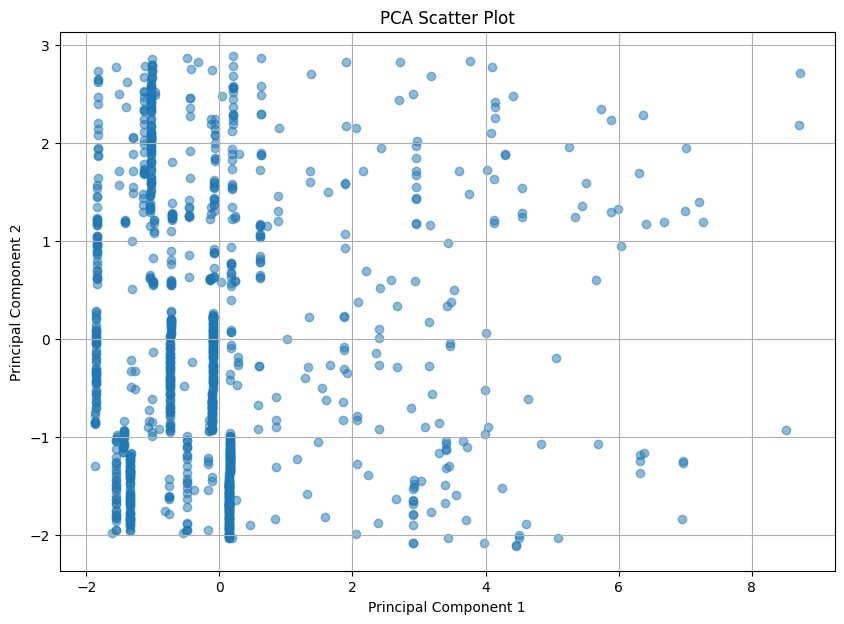

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(df['pca_1'], df['pca_2'], alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


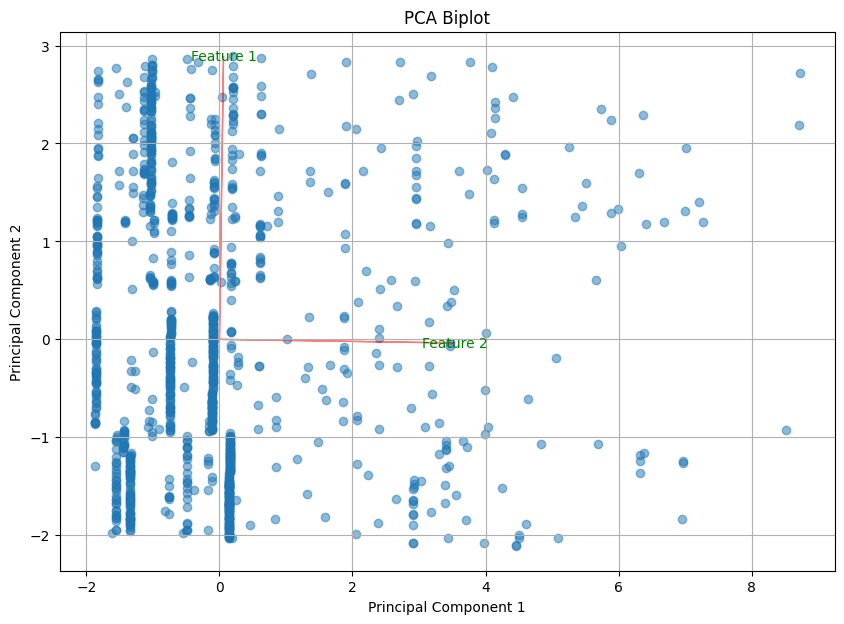

In [18]:
import numpy as np

# PCA components (eigenvectors)
components = pca.components_

plt.figure(figsize=(10, 7))
plt.scatter(df['pca_1'], df['pca_2'], alpha=0.5)

for i, component in enumerate(components):
    plt.arrow(0, 0, component[0] * 5, component[1] * 5, color='r', alpha=0.5)
    plt.text(component[0] * 5, component[1] * 5, f"Feature {i+1}", color='g', ha='center', va='center')

plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [24]:
# Step 1: Group the data by 'experience_level'
grouped_data = df.groupby('experience_level')

# Step 2: Aggregate the 'salary' column by calculating the mean and median for each group
salary_agg = grouped_data['salary'].agg(['mean', 'median'])

print(salary_agg)


                          mean   median
experience_level                       
Entry             36111.111111  30000.0
Executive         76076.923077  46000.0
Mid               51786.885246  51000.0
Senior            75088.033012  68000.0
